In [1]:
import nltk
import numpy as np
from multiprocessing import Process
from multiprocessing import Manager
from nltk.tokenize import word_tokenize
nltk.download("punkt")
from tqdm import tqdm
import pandas
import matplotlib.pyplot as plt
import pickle
import tqdm
#!pip install https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.1.0/ru_core_news_sm-3.1.0.tar.gz

[nltk_data] Downloading package punkt to /home/maximus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## –î–∞–Ω–Ω—ã–µ

In [2]:
df_data = pandas.read_csv("../data/Dude_tinkoff_new.csv")

–¢–∞–±–ª–∏—Ü–∞ –¥–ª—è —Å–±–æ—Ä–∞ –æ–±—â–µ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏:

In [3]:
total_stat = pandas.DataFrame(columns=['models', 'class_size']) 

–¢–∞–±–ª–∏—Ü–∞ –¥–ª—è —Å–±–æ—Ä–∞ –æ–±—â–µ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –ø–æ –∞–≤—Ç–æ—Ä–∞–º:

In [4]:
df_auth_stat = pandas.DataFrame(columns=['models', 'number_of_authors']) 

–¢–∞–±–ª–∏—Ü–∞ —Å –¥–∞–Ω–Ω—ã–º–∏

In [5]:
df_data.head()

Unnamed: 0                 author_id  \
0          0  UC2yzgGYTEDdRNVkayjW1C2w   
1          1  UCg9iwvHlL3awmOHNHsBFEUA   
2          2  UCdMwli0sTZ8jgLYXHTVZ8Gg   
3          3  UCBHQrudnNCELvzFu9NYADmA   
4          4  UCCZT1uuGwvTX45qOH6WgpSg   

                                          author_url          author_name  \
0  http://www.youtube.com/channel/UC2yzgGYTEDdRNV...  –í–ª–∞–¥–∏–º–∏—Ä –í–∏–Ω–æ–≥—Ä–∞–¥–æ–≤   
1  http://www.youtube.com/channel/UCg9iwvHlL3awmO...        Dmitry Gaskov   
2  http://www.youtube.com/channel/UCdMwli0sTZ8jgL...    Sveta Teryoshkina   
3  http://www.youtube.com/channel/UCBHQrudnNCELvz...         Irina Bychal   
4  http://www.youtube.com/channel/UCCZT1uuGwvTX45...      –ê–ª–µ–∫—Å–∞–Ω–¥—Ä –ù–æ—Å–æ–≤   

                                                text reply_count  top_level  \
0  –í–æ—Ç –∏ –¥–æ –Ø–Ω–¥–µ–∫—Å–∞ –¥–æ–±—Ä–∞–ª–∏—Å—å. \n–Æ—Ä–∏–π –î., –ø–æ—Ä–∞ –ê—Ä...           0        0.0   
1                 –ê –≥–¥–µ –ø–æ–º–µ—Ç–∫–∞ "–ù–∞ –ø—Ä–∞–≤–∞—Ö —Ä–µ–∫–ª–∞–º—ã"?           0        0.0   
2            –û–ª–µ–≥, –∂–∏–≤–∏—Ç–µ! –í—ã –∫—Ä—É—Ç–æ–π —á–µ–ª–æ–≤–µ–∫! –ê–º–∏–Ω—å!           0        0.0   
3  –°–ø–∞—Å–∏–±–æ –∑–∞ –∏–Ω—Ç–µ—Ä–≤—å—é, –∑–∞ –∞–¥–µ–∫–≤–∞—Ç–Ω–æ—Å—Ç—å.–¢–æ–∂–µ –Ω–µ –º...           0        0.0   
4  –ú–æ–ª–æ–¥–µ—Ü –≤–æ –≤—Å–µ–º! –ù–æ –∫–∞–∂–µ—Ç—Å—è —á—Ç–æ –æ–Ω –∑–∞–ø—É—Ç–∞–ª—Å—è –∫...           0        0.0   

   index           publishedAt              updateAt  likeCount  
0    0.0  2022-12-11T16:37:04Z  2022-12-11T16:37:04Z        0.0  
1    1.0  2022-12-11T09:51:29Z  2022-12-11T09:51:29Z        0.0  
2    2.0  2022-12-11T06:30:14Z  2022-12-11T06:30:14Z        1.0  
3    3.0  2022-12-11T05:51:37Z  2022-12-11T05:51:37Z        1.0  
4    4.0  2022-12-10T20:48:15Z  2022-12-10T20:48:15Z        0.0

In [6]:
df_data["text"] = df_data["text"].astype('str')

In [7]:
df_data = df_data.dropna()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91809 entries, 0 to 93338
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   91809 non-null  object 
 1   author_id    91809 non-null  object 
 2   author_url   91809 non-null  object 
 3   author_name  91809 non-null  object 
 4   text         91809 non-null  object 
 5   reply_count  91809 non-null  object 
 6   top_level    91809 non-null  float64
 7   index        91809 non-null  float64
 8   publishedAt  91809 non-null  object 
 9   updateAt     91809 non-null  object 
 10  likeCount    91809 non-null  float64
dtypes: float64(3), object(8)
memory usage: 8.4+ MB


In [8]:
df_data[df_data["author_name"].isnull()]["Unnamed: 0"][:3]

Series([], Name: Unnamed: 0, dtype: object)

## –í—ã–¥–µ–ª–µ–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∫–æ—Ç–æ—Ä—ã–µ —á–∞—Å—Ç–æ –æ—Å—Ç–∞–≤–ª—è—é—Ç –∫–æ–º–º–µ–Ω–∞—Ç—Ä–∏–∏

In [9]:
d = df_data.groupby(by=["author_id"], dropna=False).agg(full_text =("text","sum"), count=("author_id","count"))

–ë—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ç–æ–ª—å–∫–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∫–æ—Ç–æ—Ä—ã–µ —á–∞—Å—Ç–æ –∫–æ–º–º–µ–Ω—Ç–∏—Ä—É—é—Ç (–±–æ–ª–µ–µ 5 —Ä–∞–∑)

In [10]:
res = d.sort_values(by="count", ascending=False)
res = res[res["count"]>=3]

In [11]:
res[res["count"]>=2]["count"].sum()

22661

In [12]:
res.shape

(4267, 2)

In [13]:
#delete_auth = set(df_data["author_id"].to_list())- set(res.index.to_list())
auth = set(res.index.to_list())

In [14]:
df = df_data.copy()
df = df.loc[df["author_id"].isin(auth)]
train_corpus = df["text"]

In [15]:
total_stat = total_stat.append({'models':'total', 'class_size':train_corpus.shape[0]}, ignore_index=True)

/tmp/ipykernel_110828/2549823037.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_stat = total_stat.append({'models':'total', 'class_size':train_corpus.shape[0]}, ignore_index=True)


In [16]:
df_auth_stat = df_auth_stat.append({'models':'total', 'number_of_authors':df["author_id"].unique().shape[0]}, \
                                                                                            ignore_index=True)

/tmp/ipykernel_110828/969736557.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_auth_stat = df_auth_stat.append({'models':'total', 'number_of_authors':df["author_id"].unique().shape[0]}, \


## –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è –∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ 

In [17]:
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')
stop_words.extend(['br', '—ó—ó', 'quot', 'www', 'href', 'https', 'http', 'ru'])
stop_words.extend(stopwords.words('english'))

In [18]:
#from nltk.stem import WordNetLemmatizer
#wnl = WordNetLemmatizer()
import spacy
from gensim.utils import simple_preprocess
nlp = spacy.load("ru_core_news_sm")

def lemma(word):
    for w in nlp(word):
        return w.lemma_
def process_words(texts):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts_out = []
    for sent in texts:
        texts_out.append([lemma(token) for token in sent])
    # remove stopwords after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out


/home/maximus/anaconda3/lib/python3.9/site-packages/torch/cuda/__init__.py:88: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [19]:
tokenized_text = [word_tokenize(tok) for tok in train_corpus]

In [20]:
data_ready = process_words(tokenized_text)

In [21]:
processed_corpus = [" ".join(doc[:120]) for doc in data_ready] 

In [22]:
import gc
gc.collect()

632

In [23]:
from deeppavlov.core.common.file import read_json
from deeppavlov import build_model, configs

In [24]:
#from transformers import BertTokenizer
bert_config = read_json(configs.embedder.bert_embedder)
pth1 = '../bert/rubert/'
pth2 = './bert_path/cased_L-12_H-768_A-12/'
bert_config['metadata']['variables']['BERT_PATH'] = pth1

In [25]:
#bert_config

In [26]:
m = build_model(bert_config)


Some weights of the model checkpoint at /home/maximus/git/ODS_NLP_fall_2022/bert/rubert were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [27]:
from transformers import BertTokenizer

In [28]:
tokenizer = BertTokenizer.from_pretrained(pth1)

In [29]:
texts = ['–ü—Ä–∏–≤–µ—Ç –∫–∞–∫ –¥–µ–ª–∞ max.', '–Ø —Ö–æ—á—É, please!']
tok = tokenizer(processed_corpus)

In [30]:
tok.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [31]:
#tokens, token_embs, subtokens, subtoken_embs, sent_max_embs, sent_mean_embs, bert_pooler_outputs = m(texts)

In [32]:
b = 10
N = len(processed_corpus)//b
result = np.zeros([len(processed_corpus),768])
for i in tqdm.tqdm(range(N)):
    #print(f'{i*N} : {(i+1)*N}')
    _, _, _, _, _, sent_mean_embs, _ = m(processed_corpus[i*b:(i+1)*b])
    result[i*b:(i+1)*b,:] = sent_mean_embs[:,:]
    #print(sent_mean_embs.shape)
    del sent_mean_embs
    

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2266/2266 [10:45<00:00,  3.51it/s]


In [33]:
del m

In [34]:
import torch

In [35]:
torch.cuda.is_available()

False

In [36]:
gc.collect()

0

## GMM

In [37]:
class_number = 4
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=class_number,  random_state=0).fit(result)

In [38]:
class_pred = gm.predict(result)

In [39]:
from sklearn.manifold import TSNE


In [40]:
def plot_tsne(class_number, result, class_pred):
    fig = plt.figure()
    ax = fig.add_subplot(111) 
    X_embedded = TSNE(n_components=2, random_state=0, learning_rate='auto',  init='random', perplexity=5).fit_transform(result)
    colors = ['r', 'b', 'g', 'y','k']
    for i in range(class_number):
        ax.scatter(X_embedded[class_pred==i][:,0], X_embedded[class_pred==i][:,1], c=colors[i], label=f'class = {i}')
    #plt.scatter(X_embedded[pred==0][:,0], X_embedded[pred==0][:,1])
    ax.legend()
    return ax, fig, X_embedded

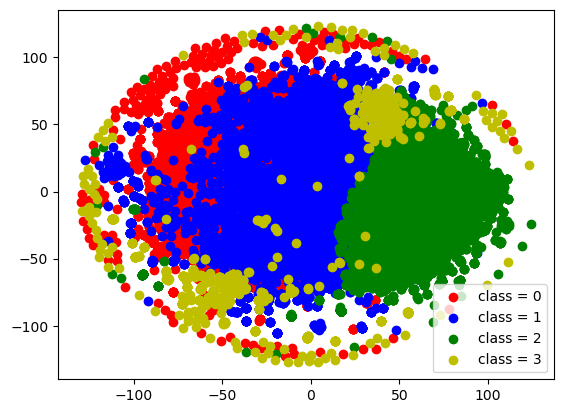

In [41]:
ax, fig1, tsne_emb = plot_tsne(class_number, result, class_pred)

In [42]:
class_with_noise = 3
fig1.savefig("../Report/pics/tsne_gmm.png")
n = train_corpus.iloc[class_pred==class_with_noise].shape[0]
print("Number element in cluster (GMM): ", n)
total_stat = total_stat.append({'models':'GMM', 'class_size':n},ignore_index=True)

Number element in cluster (GMM):  976


/tmp/ipykernel_110828/3890175370.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_stat = total_stat.append({'models':'GMM', 'class_size':n},ignore_index=True)


In [43]:
n_a = df.iloc[class_pred==class_with_noise]["author_id"].unique().shape[0]
df_auth_stat = df_auth_stat.append({'models':'GMM', 'number_of_authors':n_a},ignore_index=True)

/tmp/ipykernel_110828/2115087100.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_auth_stat = df_auth_stat.append({'models':'GMM', 'number_of_authors':n_a},ignore_index=True)


In [44]:
import codecs
LINE_WIDTH = 80
sub_indexes = np.random.randint(0,n,10)
with codecs.open("../Report/gmmclasscomment.txt","w","utf-8-sig") as f:
    #f.write("\\begin{verbatim}")
    for w in train_corpus.iloc[class_pred==class_with_noise].iloc[sub_indexes]:
        print(w)
        print("----------------------------------\n")
        f.write((w[:LINE_WIDTH] +"...\n"))
        f.write("-------------------------------------------\n")
    #f.write("\\end{verbatim}")

–¥–∏—Å—Å –Ω–∞ og buda!. <a href="https://youtu.be/WabZ3hSz2Uo">https://youtu.be/WabZ3hSz2Uo</a>
----------------------------------

‚òù To ca–ºo–µ M–ªa–¥—à–µ !7 –≤ Hu–∫e üëÜ
----------------------------------

–†–µ–∞–Ω–∏–º–∞—Ç–æ–ª–æ–≥ –æ –≤–∞–∂–Ω–æ—Å—Ç–∏ –∫–∏—Å–ª–æ—Ä–æ–¥–∞ –∏ —Ç–∫–∞–Ω–µ–≤–æ–≥–æ –¥—ã—Ö–∞–Ω–∏—è, –æ —Ä–æ–ª–∏ –°–∏–Ω—Ç–µ–∑–∏—Ç–∞ –≤ —ç—Ç–∏—Ö –ø—Ä–æ—Ü–µ—Å—Å–∞—Ö. –û—Ç–∑—ã–≤ ‚Ññ167   https://youtu.be/ymLEPAN0TrY
----------------------------------

–û—Ç –∫–∞–∫–∏—Ö –≤–æ–ø—Ä–æ—Å–æ–≤ –£–∫—Ä–∞–∏–Ω—Ü–∞–º —É –Ω–∏—Ö –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç —Å–±–æ–π –≤ –ø—Ä–æ–≥—Ä–∞–º–º–µ?–ù–∞ —á—Ç–æ –æ–Ω–∏ –Ω–µ —Å–º–æ–≥—É—Ç –æ—Ç–≤–µ—Ç–∏—Ç—å –≤–Ω—è—Ç–Ω–æ? <a href="https://youtu.be/BpmlU4Xg9hQ">https://youtu.be/BpmlU4Xg9hQ</a>
----------------------------------

https://youtu.be/JoYL1MZmXbs –≤–æ—Ç‚ù§Ô∏è
----------------------------------

<b>–ö–æ–≥–¥–∞ –ó–∞–∫–æ–Ω—á–∏—Ç—Å—è –í–æ–π–Ω–∞ üôÇüëá..</b><br><b><a href="https://youtu.be/DfOOS2F1F44">https://youtu.be/DfOOS2F1F44</a></b><br><b><a href="https://youtu

## –í—ã–±–æ—Ä —Ç–æ—á–µ–∫ –Ω–∞ –ø–µ—Ä–∏—Ñ–µ—Ä–∏–∏ –æ–∫—Ä—É–∂–Ω–æ—Å—Ç–∏

In [45]:
def plot_outside_circle(tsne_emb, r=110):
    fig = plt.figure()
    ax = fig.add_subplot(111) 
    indexes = []
    for i,p in enumerate(tsne_emb):
        if np.linalg.norm(p)>=r:
            ax.plot([p[0]],[p[1]],'ro')
            indexes.append(i)
        else:
            ax.plot([p[0]],[p[1]],'bo')
    return ax, fig, indexes
            

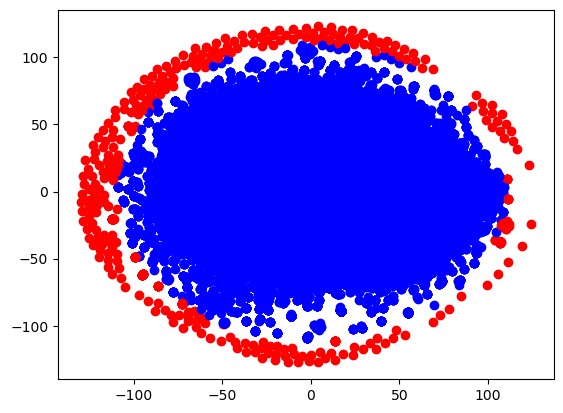

In [46]:
_, fig2, indexes = plot_outside_circle(tsne_emb)
fig2.savefig("../Report/pics/tsne_outside_circle.png")

In [47]:
n = train_corpus.iloc[indexes].shape[0]
print("Number element in cluster (outside center): ", n)
total_stat = total_stat.append({'models':'out_circle', 'class_size':n},ignore_index=True)

Number element in cluster (outside center):  436


/tmp/ipykernel_110828/4222871958.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_stat = total_stat.append({'models':'out_circle', 'class_size':n},ignore_index=True)


In [48]:
n_a = df.iloc[indexes]["author_id"].unique().shape[0]
df_auth_stat = df_auth_stat.append({'models':'out_circle', 'number_of_authors':n_a},ignore_index=True)

/tmp/ipykernel_110828/3302353349.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_auth_stat = df_auth_stat.append({'models':'out_circle', 'number_of_authors':n_a},ignore_index=True)


In [49]:
import codecs
sub_indexes = np.random.randint(0,n,10)
with codecs.open("../Report/ocentercomment.txt","w","utf-8-sig") as f:
    #f.write("\\begin{verbatim}")
    for w in train_corpus.iloc[indexes].iloc[sub_indexes]:
        print(w)
        print("----------------------------------\n")
        f.write((w[:LINE_WIDTH] +"...\n"))
        f.write("-------------------------------------------\n")
    #f.write("\\end{verbatim}")

–ù–µ –≤–∞–∂–Ω–æ —á—Ç–æ –∏ –∫–∞–∫ –≤ –£–∫—Ä–∞–∏–Ω–µ, –Ω–µ –≤–∞–∂–Ω–æ –≤–æ–æ–±—â–µ –Ω–µ—á–µ–≥–æ, —á—Ç–æ —Ç–∞–º –ø—Ä–æ–∏—Å—Ö–æ–¥–∏–ª–æ –∏ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç.<br><br>–í–∞–∂–Ω–æ –æ–¥–Ω–æ - –Ω–µ –º–æ–∂–µ—Ç —Å—É—â–µ—Å—Ç–≤–æ–≤–∞—Ç—å –≤–æ–æ–±—â–µ –Ω–∏–∫–∞–∫–∏—Ö –ø—Ä–∏—á–∏–Ω –¥–ª—è –≥–µ–Ω–æ—Ü–∏–¥–∞ –£–∫—Ä–∞–∏–Ω—Å–∫–æ–≥–æ –Ω–∞—Ä–æ–¥–∞ —á—Ç–æ —Å–æ–≤–µ—Ä—à–∞–µ—Ç —Ä–æ—Å—Å–∏–π—Å–∫–∞—è –∞—Ä–º–∏—è –ø–æ –ø—Ä–∏–∫–∞–∑—É –ø—É—Ç–∏–Ω–∞.<br><br>80 –ª–µ—Ç –Ω–∞–∑–∞–¥ —Ç–∞–∫–æ–π –≥–µ–Ω–æ—Ü–∏–¥ –¥–µ–ª–∞–ª–∞ –ì–µ—Ä–º–∞–Ω—Å–∫–∞—è –∞—Ä–º–∏—è –ø–æ –ø—Ä–∏–∫–∞–∑—É –≥–∏—Ç–ª–µ—Ä–∞, –∞ –ì–µ—Ä–º–∞–Ω—Å–∫–∞—è  –ø—Ä–æ–ø–æ–≥–∞–Ω–¥–∞ –ø—Ä–∏–¥—É–º—ã–≤–∞–ª–∞ –æ–ø—Ä–∞–≤–¥–∞–Ω–∏—è. <br>–°–µ–π—á–∞—Å –≥–µ–Ω–æ—Ü–∏–¥ —Å–æ–≤–µ—Ä—à–∞–µ—Ç —Ä–æ—Å–∏–π—Å–∫–∞—è –∞—Ä–º–∏—è –ø–æ –ø—Ä–∏–∫–∞–∑—É –ø—É—Ç–∏–Ω–∞, –∞ —Ä–æ—Å–∏–π—Å–∫–∞—è –ø—Ä–æ–ø–∞–≥–∞–Ω–¥–∞ –ø—ã—Ç–∞–µ—Ç—å—Å—è –æ–ø—Ä–∞–≤–¥—ã–≤–∞—Ç—å  —ç—Ç–æ—Ç –≥–µ–Ω–æ—Ü–∏–¥ –£–∫—Ä–∞–∏–Ω—Å–∫–æ–≥–æ –Ω–∞—Ä–æ–¥–∞.<br><br>–í–∫–ª—é—á–∞–π—Ç–µ —Å–≤–æ–∏ –º–æ–∑–≥–∏, –Ω–∞—á–Ω–∏—Ç–µ –¥—É–º–∞—Ç—å —Å–≤–æ–µ–π –≥–æ–ª

In [50]:
train_corpus.iloc[indexes].shape

(436,)

## K-means

In [51]:
from sklearn.cluster import KMeans

In [52]:
km = KMeans(n_clusters=class_number, random_state=0).fit(result)

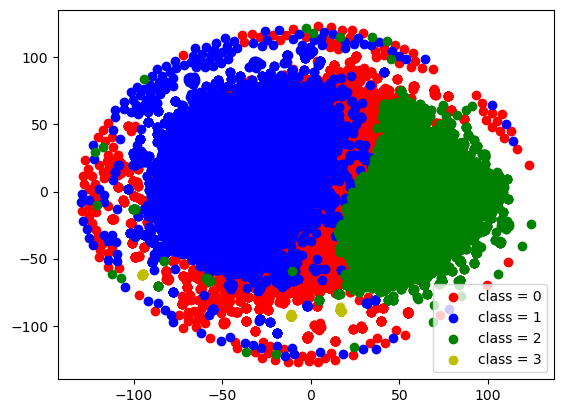

In [53]:
_, fig3, _ = plot_tsne(class_number, result, km.labels_)
fig3.savefig("../Report/pics/tsne_kmeans.png")

In [54]:
class_with_noise = 3
n = train_corpus.iloc[km.labels_==class_with_noise].shape[0]
print("Number element in cluster (K-means): ", n)
total_stat = total_stat.append({'models':'kmeans', 'class_size':n},ignore_index=True)

Number element in cluster (K-means):  413


/tmp/ipykernel_110828/2932100068.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_stat = total_stat.append({'models':'kmeans', 'class_size':n},ignore_index=True)


In [55]:
n_a = df.iloc[km.labels_==class_with_noise]["author_id"].unique().shape[0]
df_auth_stat = df_auth_stat.append({'models':'kmeans', 'number_of_authors':n_a},ignore_index=True)

/tmp/ipykernel_110828/627125377.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_auth_stat = df_auth_stat.append({'models':'kmeans', 'number_of_authors':n_a},ignore_index=True)


In [56]:
import codecs
LINE_WIDTH = 80
sub_indexes = np.random.randint(0,n,10)
with codecs.open("../Report/kmeansclasscomment.txt","w","utf-8-sig") as f:
    #f.write("\\begin{verbatim}")
    for w in train_corpus.iloc[km.labels_].iloc[sub_indexes]:
        print(w)
        print("----------------------------------\n")
        f.write((w[:LINE_WIDTH] + "...\n"))
        f.write("-------------------------------------------\n")
    #f.write("\\end{verbatim}")

Z
----------------------------------

Z
----------------------------------

–ï—Å–ª–∏ –±—ã –º—ã –Ω–µ –≤–µ–ª–∏ –≤–æ–π—Å–∫–∞ –≤ –£–∫—Ä–∞–∏–Ω—É –æ–Ω–∞ –±—ã –Ω–∞–ø–∞–ª–∞ –Ω–∞ –Ω–∞—Å –∞ –¢–∏–Ω—å–∫–æ–≤ –æ–Ω –∫–ª–æ—É–Ω
----------------------------------

–ï—Å–ª–∏ –±—ã –º—ã –Ω–µ –≤–µ–ª–∏ –≤–æ–π—Å–∫–∞ –≤ –£–∫—Ä–∞–∏–Ω—É –æ–Ω–∞ –±—ã –Ω–∞–ø–∞–ª–∞ –Ω–∞ –Ω–∞—Å –∞ –¢–∏–Ω—å–∫–æ–≤ –æ–Ω –∫–ª–æ—É–Ω
----------------------------------

–í –¥–µ–Ω—å–≥–∞—Ö —Å–∏–ª–∞—Ö. –ï—Å—Ç—å –¥–µ–Ω—å–≥–∏, –µ—Å—Ç—å –∫–æ–º—Ñ–æ—Ä—Ç, –µ—Å—Ç—å —Ä–∞–∑–≤–∏—Ç–∏–µ, –µ—Å—Ç—å –±—É–¥—É—â–µ–µ.
----------------------------------

–ï—Å–ª–∏ –±—ã –º—ã –Ω–µ –≤–µ–ª–∏ –≤–æ–π—Å–∫–∞ –≤ –£–∫—Ä–∞–∏–Ω—É –æ–Ω–∞ –±—ã –Ω–∞–ø–∞–ª–∞ –Ω–∞ –Ω–∞—Å –∞ –¢–∏–Ω—å–∫–æ–≤ –æ–Ω –∫–ª–æ—É–Ω
----------------------------------

–í –¥–µ–Ω—å–≥–∞—Ö —Å–∏–ª–∞—Ö. –ï—Å—Ç—å –¥–µ–Ω—å–≥–∏, –µ—Å—Ç—å –∫–æ–º—Ñ–æ—Ä—Ç, –µ—Å—Ç—å —Ä–∞–∑–≤–∏—Ç–∏–µ, –µ—Å—Ç—å –±—É–¥—É—â–µ–µ.
----------------------------------

–í –¥–µ–Ω—å–≥–∞—Ö —Å–∏–ª–∞—Ö. –ï—Å—Ç—å –¥–µ–Ω—å–≥–∏, –µ—Å—Ç—å –∫–æ–º—Ñ–æ—Ä—Ç, –

In [57]:
# –û–±—â–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –∫–ª–∞—Å—Å–∞–º

In [58]:
total_stat

models class_size
0       total      22661
1         GMM        976
2  out_circle        436
3      kmeans        413

In [59]:
total_stat.to_csv("total_stat.csv")

In [60]:
df_auth_stat

models number_of_authors
0       total              4267
1         GMM               319
2  out_circle                58
3      kmeans               255

In [63]:
df_auth_stat.to_csv("total_auth_stat.csv")

In [62]:
df_auth_stat

models number_of_authors
0       total              4267
1         GMM               319
2  out_circle                58
3      kmeans               255